# Learning without guidance – unsupervised learning

### **Quick Summary: Unsupervised Learning**  

#### **What is it?**  
- Learns **without labels/answers** (unlabeled data).  
- Discovers **hidden patterns** in data (no "right/wrong" result).  

#### **Key Analogy**  
> *Imagine exam practice questions **without answers**:*  
> - **Supervised**: Learn from questions **+ answers**.  
> - **Unsupervised**: Find patterns in **questions alone** (e.g., grouping similar ones).  

#### **Common Tasks**  
1. **Clustering** (Grouping):  
   - *Example:* Group similar news articles.  
   - *Use:* Customer segmentation, behavior analysis.  
2. **Association/Anomaly Detection**:  
   - *Example:* Spot rare/fraudulent transactions.  
   - *Use:* Outlier detection, recommendation systems.  
3. **Projection** (Dimensionality Reduction):  
   - *Example:* Simplify text data (like t-SNE).  
   - *Use:* Visualizing complex data, removing noise.  

#### **Why Use It?**  
- **No labels needed** → Great for text/NLP (labeling is hard!).  
- **Exploratory**: Finds hidden structures (e.g., themes in newsgroups).  

#### **Real-World Apps**  
- Topic modeling (e.g., newsgroup themes).  
- Customer segmentation.  
- Anomaly detection (fraud, rare events).  

---  
**Key Takeaway**: Unsupervised learning finds hidden patterns in **unlabeled data** via clustering, association, or projection. Ideal for text/NLP!  
**Next**: Clustering newsgroups data (e.g., k-means).

### **k-Means Clustering**  

#### **Goal**  
Partition data into **`k` groups** based on feature similarities.  

#### **Key Steps**  
1. **Specify `k`**:  
   - Choose the number of clusters (e.g., `k=3` for 3 groups).  

2. **Initialize Centroids**:  
   - Randomly pick `k` data points as starting centers.  

3. **Assign Clusters**:  
   - Assign every data point to the **nearest centroid** using:  
     - **Euclidean distance** (most common): `√(Σ(xᵢ - yᵢ)²)`  
     - *Other options*: Manhattan, Chebyshev.  

4. **Update Centroids**:  
   - Recalculate centroids as the **mean of all points** in each cluster.  

5. **Repeat Until Convergence**:  
   - Reassign points → update centroids → repeat.  
   - **Stop when**:  
     - Centroids stabilize (no change), OR  
     - Max iterations reached.  

---

#### **Outputs**  
- **Cluster IDs** (1 to `k`) for all training samples.  
- **`k` Centroids** used to cluster *new* data (assign to nearest centroid).  

---

### **Why "k-Means"?**  
- "k" = number of clusters.  
- "Means" = centroids are updated as the **mean** of cluster points.  

**Key Insight**: Creates spherical clusters of similar size.  
**Weakness**: Sensitive to initial centroids → Run multiple times!  
**Use Case**: Customer segmentation, image compression, document grouping.

In [157]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:, 2:4]
y = iris.target

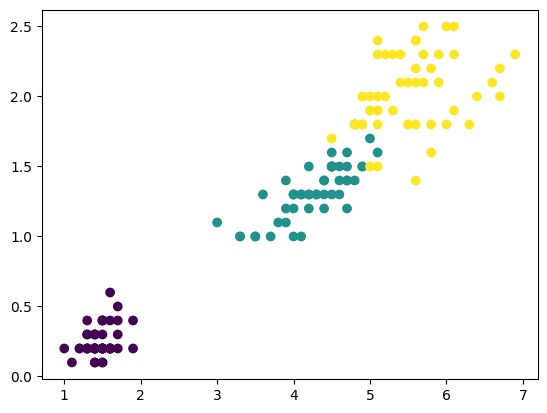

In [158]:
import numpy as np
from matplotlib import pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [159]:
# Step 1: Specify k and initialize centroids
k = 3
np.random.seed(0)
random_index = np.random.choice(range(len(X)), k)
centroids = X[random_index]

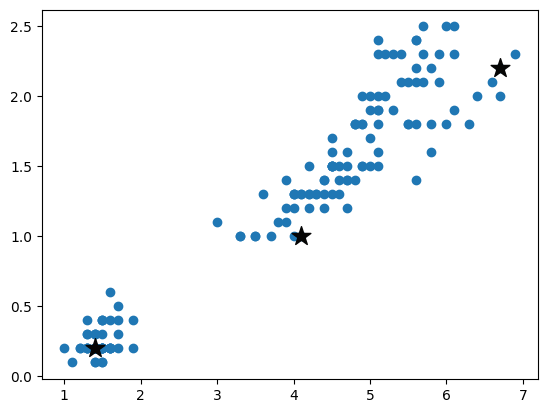

In [160]:
def visualize_centroids(X, centroids):
    """Visualize data points and centroids"""
    plt.scatter(X[:, 0], X[:, 1])
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='#050505')
    plt.show()

visualize_centroids(X, centroids)

In [161]:
# Helper functions
def dist(a, b):
    """Calculate Euclidean distance between points"""
    return np.linalg.norm(a - b, axis=1)

def assign_cluster(x, centroids):
    """Assign sample to nearest centroid's cluster"""
    distances = dist(x, centroids)
    cluster = np.argmin(distances)
    return cluster

def update_centroids(X, centroids, clusters):
    """Update centroids to be mean of their cluster's samples"""
    for i in range(k):
        cluster_i = np.where(clusters == i)
        centroids[i] = np.mean(X[cluster_i], axis=0)


In [162]:

# Training parameters
tol = 0.0001
max_iter = 100

# Initialize variables
iter = 0
centroids_diff = 100000
clusters = np.zeros(len(X))




Iteration: 1
Centroids:
 [[1.462      0.246     ]
 [5.80285714 2.11142857]
 [4.42307692 1.44153846]]
Centroids move: 1.0574


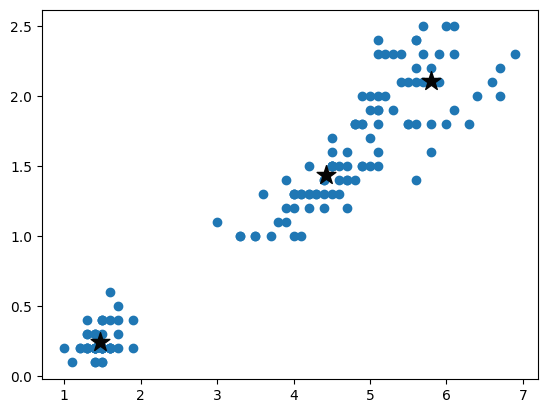

Iteration: 2
Centroids:
 [[1.462      0.246     ]
 [5.73333333 2.09487179]
 [4.37704918 1.40819672]]
Centroids move: 0.0913


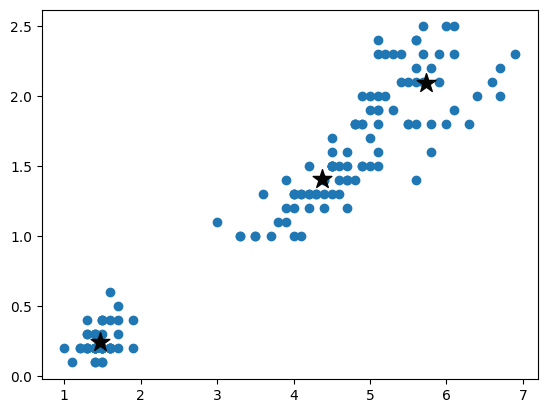

Iteration: 3
Centroids:
 [[1.462      0.246     ]
 [5.68333333 2.08095238]
 [4.34310345 1.38275862]]
Centroids move: 0.0670


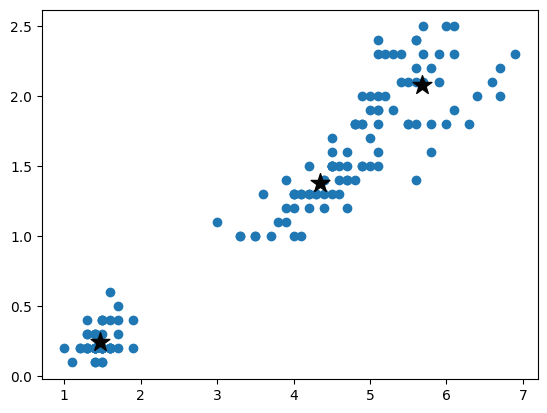

Iteration: 4
Centroids:
 [[1.462      0.246     ]
 [5.65227273 2.06818182]
 [4.31964286 1.36785714]]
Centroids move: 0.0436


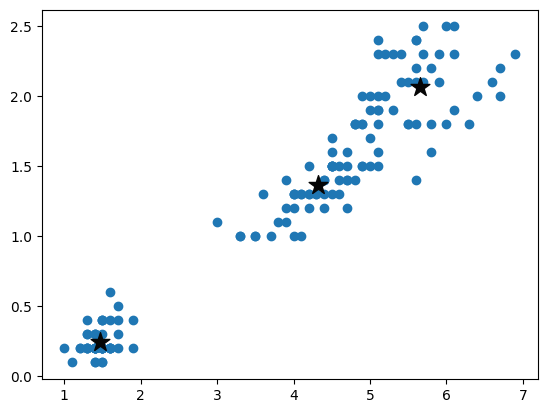

Iteration: 5
Centroids:
 [[1.462      0.246     ]
 [5.63777778 2.06      ]
 [4.30727273 1.36181818]]
Centroids move: 0.0216


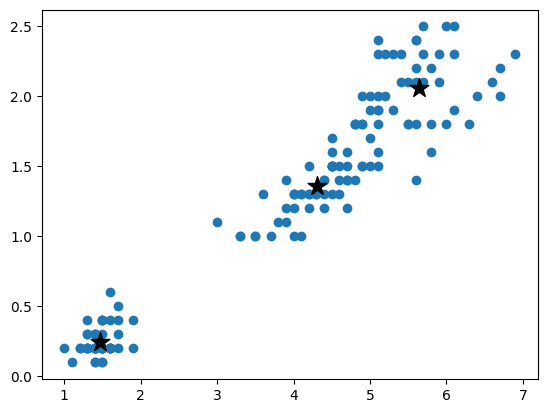

Iteration: 6
Centroids:
 [[1.462      0.246     ]
 [5.62608696 2.04782609]
 [4.29259259 1.35925926]]
Centroids move: 0.0225


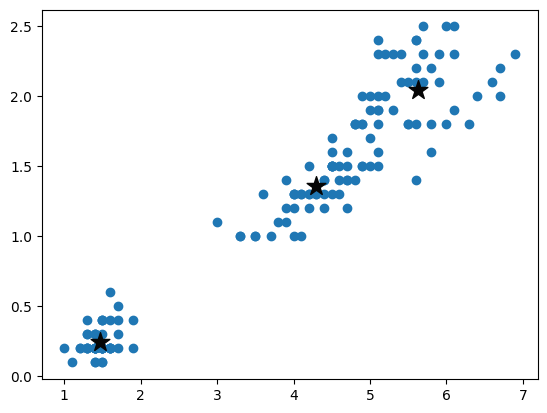

Iteration: 7
Centroids:
 [[1.462      0.246     ]
 [5.62608696 2.04782609]
 [4.29259259 1.35925926]]
Centroids move: 0.0000


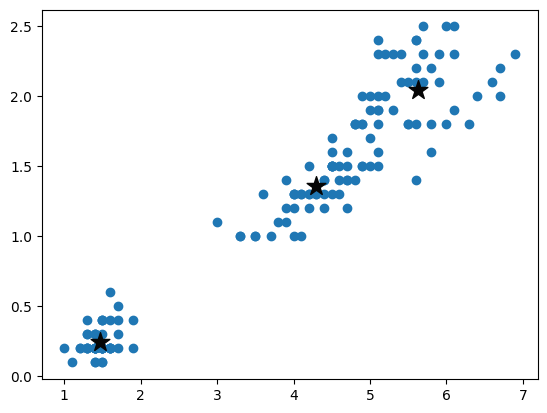

In [163]:
from copy import deepcopy
# Step 5: Training loop
while iter < max_iter and centroids_diff > tol:
    # Step 3: Assign clusters
    for i in range(len(X)):
        clusters[i] = assign_cluster(X[i], centroids)

    # Step 4: Update centroids
    centroids_prev = deepcopy(centroids)
    update_centroids(X, centroids, clusters)

    # Update iteration counters
    iter += 1
    centroids_diff = np.linalg.norm(centroids - centroids_prev)

    # Print progress and visualize
    print(f'Iteration: {iter}')
    print(f'Centroids:\n {centroids}')
    print(f'Centroids move: {centroids_diff:5.4f}')
    visualize_centroids(X, centroids)


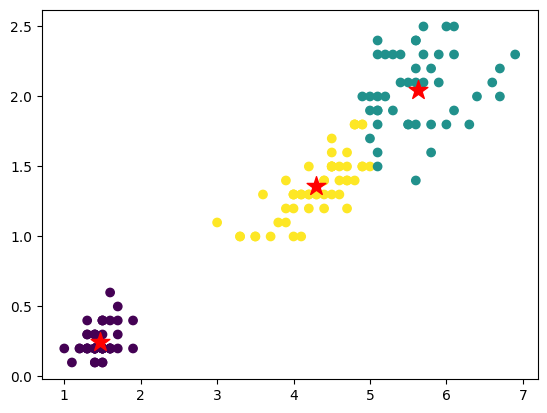

In [164]:
# Final result visualization
plt.scatter(X[:, 0], X[:, 1], c=clusters)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='r')
plt.show()

## Implementing k-means with scikit-learn

1. First, import the KMeans class and initialize a model with three clusters, as follows:

In [165]:
from sklearn.cluster  import KMeans
kmeans_sk = KMeans(n_clusters=3 , n_init='auto',random_state=42)

# KMeans Class Parameters

| Constructor Parameter | Default Value | Example Values | Description |
|----------------------|---------------|----------------|-------------|
| `n_clusters`         | 8             | 3, 5, 10       | Number of clusters (k) to form |
| `max_iter`           | 300           | 10, 100, 500   | Maximum number of iterations for the algorithm |
| `tol`                | 1e-4          | 1e-5, 1e-8     | Tolerance to declare convergence |
| `random_state`       | None          | 0, 42          | Random seed for program reproducibility |

2. We then fit the model on the data:

In [166]:
kmeans_sk.fit(X)

KMeans(n_clusters=3, random_state=42)

3. After that, we can obtain the clustering results, including the clusters for data samples and
centroids of individual clusters:

In [167]:
clusters_sk = kmeans_sk.labels_
centroids_sk = kmeans_sk.cluster_centers_

4. Similarly, we plot the clusters along with the centroids:

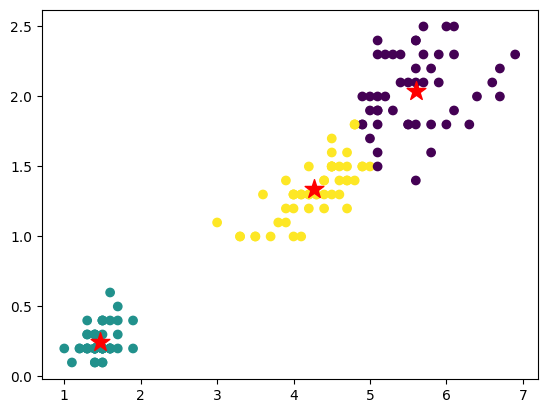

In [168]:
plt.scatter(X[:, 0], X[:, 1], c=clusters_sk)
plt.scatter(centroids_sk[:, 0], centroids_sk[:, 1], marker='*',s=200, c='r')
plt.show()


## Choosing the value of k

## Quick Summary
When we don't know how many clusters to use in k-means, we use the **elbow method** to find the optimal value of k.

## How It Works
1. **Train multiple models** with different k values (k=1, 2, 3, ...)
2. **Calculate SSE** (Sum of Squared Errors) for each model
   - SSE = total squared distance between each point and its cluster centroid
   - Lower SSE means tighter clusters
3. **Plot k vs SSE** and look for the "elbow" point

## The "Elbow" Point
- Where the SSE curve bends sharply like an elbow
- Before this point: adding clusters significantly improves fit
- After this point: additional clusters provide little improvement
- This elbow indicates the optimal number of clusters

## Simple Analogy
Like bending your arm - there's a clear point where the bend occurs, telling you where the natural grouping stops improving.

The elbow method helps find the sweet spot between too few clusters (poor fit) and too many clusters (overfitting).

In [169]:
X = iris.data
y = iris.target
k_list  = list(range(1,7))
sse_list = [0] * len(k_list)

we train individual models and record
the resulting SSE, respectively:

In [170]:
for k_ind , k in enumerate(k_list):
    kmeans = KMeans(n_clusters=k , n_init='auto',random_state=42)
    kmeans.fit(X)
    clusters = kmeans.labels_
    centroids = kmeans.cluster_centers_
    sse = 0
    for i in range(k):
      cluster_i =  np.where(clusters == i)
      sse += np.sum(np.square(X[cluster_i] - centroids[i]))
    print(f'k={k} , SSE ={sse}')
    sse_list[k_ind] =sse

k=1 , SSE =681.3706
k=2 , SSE =152.34795176035792
k=3 , SSE =78.8556658259773
k=4 , SSE =57.35088021295474
k=5 , SSE =46.472230158730156
k=6 , SSE =39.066035353535355


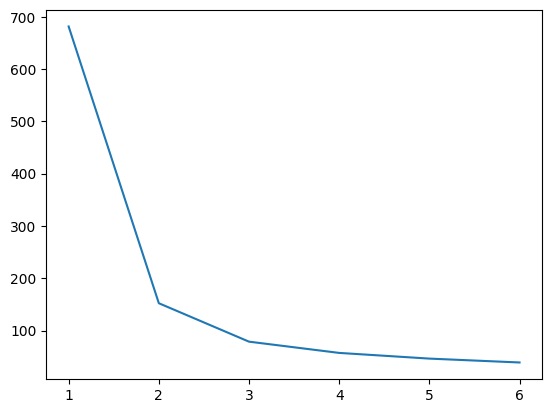

In [171]:
plt.plot(k_list,sse_list)
plt.show()

# Clustering newsgroups dataset

In [172]:
from sklearn.datasets import fetch_20newsgroups
from nltk.corpus import names
from nltk.stem import WordNetLemmatizer
import nltk

nltk.download('names')
nltk.download('wordnet')

[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [173]:
categories = [
'alt.atheism',
'talk.religion.misc',
'comp.graphics',
'sci.space',
]

newsgroups = fetch_20newsgroups(subset='all',categories= categories)

labels = newsgroups.target
label_names = newsgroups.target_names


all_names  = set(names.words())
lemmatizer = WordNetLemmatizer()
def get_clean_data(groups,lemmatizer , remove_words):
  data_cleaned = []
  for doc in groups.data:
    doc = doc.lower()
    doc_cleaned = ' '.join(lemmatizer.lemmatize(word)
                            for word in doc.split()
                            if word.isalpha() and word not in remove_words)
    data_cleaned.append(doc_cleaned)
  return data_cleaned


data_cleaned = get_clean_data(newsgroups,lemmatizer,all_names)

We then convert the cleaned text data into count vectors using CountVectorizer from scikit-learn:

In [174]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer(stop_words="english",
                               max_features=None,
                               max_df=0.5,
                               min_df=2)
data_cv = count_vector.fit_transform(data_cleaned)

The vectorizer uses **document frequency** to filter words:
- **min_df=2%**: Excludes words appearing in fewer than 2% of documents (removes rare terms)
- **max_df=50%**: Excludes words appearing in more than 50% of documents (removes overly common terms)

This automatically filters out irrelevant words without setting a fixed feature limit, keeping only terms that are neither too rare nor too common to be meaningful.

In [175]:
k = 4
kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
kmeans.fit(data_cv)

KMeans(n_clusters=4, random_state=42)

In [176]:
clusters = kmeans.labels_
from collections import Counter
print(Counter(clusters))

Counter({np.int32(3): 3370, np.int32(0): 13, np.int32(1): 3, np.int32(2): 1})


## TF-IDF: Better Text Representation for Clustering

#### The Problem with Simple Word Counts
- Most samples ended up in one big cluster (3360 samples in cluster 3)
- Common words (like "the", "and", "get") dominate the clustering
- Rare but meaningful words don't get enough importance

#### Why TF-IDF Works Better
**TF-IDF** (Term Frequency-Inverse Document Frequency) solves this by:

1. **Term Frequency (TF)**: How often a word appears in a document (same as count vectorizer)
2. **Inverse Document Frequency (IDF)**: Downweights words that appear in many documents

##### IDF Formula:
```
idf(t) = log(nD / (1 + nt))
```
- `nD`: Total number of documents
- `nt`: Number of documents containing term t
- `+1`: Prevents division by zero

### Key Benefit:
- **Common words** (like "get", "make") get low weights
- **Rare but meaningful words** get high weights
- Clusters become more semantically meaningful



This small change often significantly improves text clustering results by focusing on truly distinctive words rather than common ones.

In [177]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vector = TfidfVectorizer(stop_words='english',
                               max_features=None,
                               max_df=0.5,
                               min_df=2)

**Summary:**

- **max_df=0.5**: Excludes terms that appear in **more than 50% of documents** (removes overly common words)
- **min_df=0.02**: Excludes terms that appear in **fewer than 2% of documents** (removes overly rare words)

**Action:**  
Redo feature extraction using **TfidfVectorizer** (instead of CountVectorizer) with these parameters, then apply k-means clustering on the resulting improved feature space.

In [178]:
data_tv = tfidf_vector.fit_transform(data_cleaned)
kmeans.fit(data_tv)
clusters = kmeans.labels_
print(Counter(clusters))

Counter({np.int32(2): 1206, np.int32(0): 1196, np.int32(3): 742, np.int32(1): 243})


In [179]:
cluster_label = {i: labels[np.where(clusters == i)] for i in range(k)}

terms = tfidf_vector.get_feature_names_out()
centroids = kmeans.cluster_centers_

for cluster , index_list in cluster_label.items():
  counter  = Counter(cluster_label[cluster])
  print(f'cluster_{cluster}: {len(index_list)} samples ')
  for label_index , count in sorted( counter.items(),
                                    key=lambda x:x[1], reverse= True):
    print(f'- {label_names[label_index]}: {count} samples')

  print(f'Top 10 terms for cluster {cluster}:')
  for ind in centroids[cluster].argsort()[-10:]:
    print(' %s' % terms[ind], end="")

  print()

cluster_0: 1196 samples 
- alt.atheism: 618 samples
- talk.religion.misc: 524 samples
- sci.space: 35 samples
- comp.graphics: 19 samples
Top 10 terms for cluster 0:
 ha just jesus think christian people say article god wa
cluster_1: 243 samples 
- alt.atheism: 112 samples
- sci.space: 88 samples
- talk.religion.misc: 35 samples
- comp.graphics: 8 samples
Top 10 terms for cluster 1:
 moral article comet institute pasadena keith ray gamma california allan
cluster_2: 1206 samples 
- comp.graphics: 942 samples
- sci.space: 134 samples
- talk.religion.misc: 65 samples
- alt.atheism: 65 samples
Top 10 terms for cluster 2:
 thanks need looking know computer program file university graphic image
cluster_3: 742 samples 
- sci.space: 730 samples
- comp.graphics: 4 samples
- talk.religion.misc: 4 samples
- alt.atheism: 4 samples
Top 10 terms for cluster 3:
 hst mission just moon article nasa launch shuttle wa space


## Describing the clusters using GPT

In [180]:
keywords = ' '.join(terms[ind] for ind in centroids[0].argsort()[-100:])

print(keywords)

let real church simply used state man understand quote going look free activity david sure apr different better biblical view saying science rushdie post ksand death new accept john value christianity day kent muslim private little human person statement thought atheism group agree case islam true child love faith law book world religious question argument tell life point fact word reason objective come right want evidence claim belief really islamic koresh way time read thing good mean university did bible moral said morality religion like atheist make doe know believe ha just jesus think christian people say article god wa


Had parti tkhribik tan b3d mouhim khdmat walakin hi bach nchoufou natia wacg hiya hiya

In [181]:
from google.colab import userdata
import google.generativeai as genai

# Retrieve the Gemini API key from Colab Secrets
GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

# Initialize the Gemini model
gemini_model = genai.GenerativeModel('gemini-1.5-flash')

def get_completion_gemini(prompt):
    try:
      response = gemini_model.generate_content(
          prompt,
          generation_config=genai.types.GenerationConfig(
              temperature=0.1,
              top_p=0.95
          )
      )
      return response.text
    except Exception as e:
        return f"Error: {str(e)}"

# Example usage
response_gemini = get_completion_gemini(
    f"Describe a common topic based on the following keywords: {keywords}"
)
print(response_gemini)

The common topic connecting these keywords is the **nature of faith, belief, and morality, particularly in the context of religious and non-religious worldviews.**  The keywords touch upon various aspects of this topic, including:

* **Religious debates:**  The presence of terms like "Christianity," "Islam," "atheism," "Bible," "Quran," "God," "Jesus," "religious," "faith," "belief," and references to specific religious figures (David, John, Koresh) indicate discussions surrounding different religious perspectives and their arguments.

* **Moral philosophy:** Words like "moral," "morality," "good," "right," "value," and "objective" suggest explorations into ethical frameworks and the sources of morality – whether rooted in religious texts, philosophical reasoning, or other systems.

* **The role of evidence and reason:** Terms such as "evidence," "reason," "fact," "science," "argument," and "claim" point to the ongoing debate about the role of empirical evidence and logical reasoning i

### DBSCAN: Density-Based Clustering Algorithm

#### **Key Concept**
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) identifies clusters based on **data density** rather than centroid proximity.

## **How It Differs from K-Means**
- **No need to specify number of clusters** in advance
- **Finds arbitrarily shaped clusters** (not just spherical)
- **Identifies outliers** as noise points
- **Works well with spatial data** and non-uniform cluster densities

#### **Core Parameters**
1. **ε (epsilon)**: Maximum distance between points to be considered neighbors
2. **min_samples**: Minimum points needed to form a dense region

#### **How It Works**
1. Randomly select a point and find all points within ε distance
2. If enough points (≥ min_samples) are found:
   - Mark as **core point** and create new cluster
   - Recursively expand cluster by adding all reachable points
3. If not enough points:
   - Mark as **noise** (outlier)
4. Repeat until all points are processed

#### **Key Advantages**
- Discovers natural cluster shapes
- Robust to outliers
- Doesn't require pre-specifying cluster count
- Handles varying cluster densities well

DBSCAN is particularly useful when you don't know how many clusters to expect or when clusters have irregular geometries.

## Discovering underlying topics in newsgroups

## What is Topic Modeling?
Topic modeling is a statistical technique that discovers hidden thematic structures in text documents by identifying probability distributions of words associated with each topic.

### Key Concepts:
- **Topics** are represented as collections of related words with probabilities
- **Documents** are mixtures of multiple topics with different weights
- Unlike dictionary definitions, topics here are statistical abstractions from word patterns

## Two Main Approaches:

### 1. Non-Negative Matrix Factorization (NMF)
A dimensionality reduction technique that factorizes a term-document matrix:

**Matrix Representation:**
- **V** (n × m): Input term count or TF-IDF matrix (n documents × m terms)
- **W** (t × m): Feature matrix showing term importance in each topic
- **H** (n × t): Coefficient matrix showing topic weights in each document

**How it works:** NMF decomposes V ≈ W × H where all matrices contain only non-negative values

### 2. Latent Dirichlet Allocation (LDA)
A probabilistic approach that models documents as mixtures of topics and topics as distributions over words.

## Practical Application:
These techniques help discover semantic patterns in text data, allowing us to:
- Identify main themes across documents
- Understand how topics are distributed
- Extract meaningful features from unstructured text

## Implementation:
Scikit-learn provides implementations for both NMF and LDA in its decomposition module, making it straightforward to apply these techniques to text data like newsgroups.


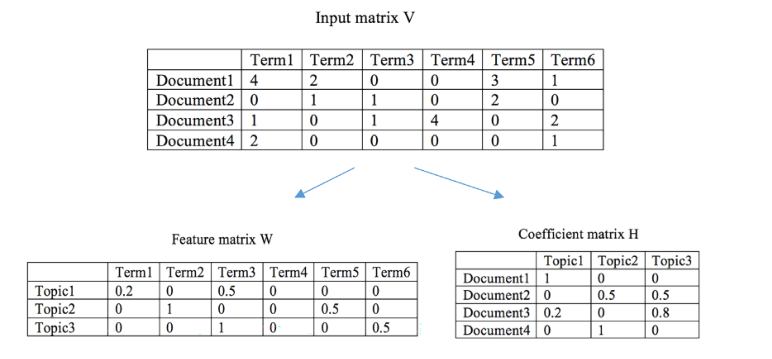

In [182]:
from sklearn.decomposition import NMF
t = 20
nmf = NMF(n_components=t, random_state=42)

# NMF Class Parameters Summary

| Parameter | Default Value | Example Values | Description |
|-----------|---------------|----------------|-------------|
| **n_components** | None | 5, 10, 20 | Number of topics to extract. If None, uses number of input features. |
| **max_iter** | 200 | 100, 200 | Maximum number of iterations for the optimization algorithm. |
| **tol** | 1e-4 | 1e-5, 1e-8 | Tolerance for stopping condition (convergence threshold). |


In [183]:
nmf.fit(data_cv)

NMF(n_components=20, random_state=42)

In [184]:
print(nmf.components_)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.82943860e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  7.79369242e-04 3.87306064e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.71128084e-02
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 4.29898976e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [185]:
terms_cv = count_vector.get_feature_names_out()
for topic_idx, topic in enumerate(nmf.components_):
  print("Topic {}:" .format(topic_idx))
  print(" ".join([terms_cv[i] for i in topic.argsort()[-10:]]))

Topic 0:
available quality program free color version gif file image jpeg
Topic 1:
ha article make know doe say like just people think
Topic 2:
include available analysis user software ha processing data tool image
Topic 3:
atmosphere kilometer surface ha earth wa planet moon spacecraft solar
Topic 4:
communication technology venture service market ha commercial space satellite launch
Topic 5:
verse wa jesus father mormon shall unto mcconkie lord god
Topic 6:
format message server object image mail file ray send graphic
Topic 7:
christian people doe atheism believe religion belief religious god atheist
Topic 8:
file graphic grass program ha package ftp available image data
Topic 9:
speed material unified star larson book universe theory physicist physical
Topic 10:
planetary station program group astronaut center mission shuttle nasa space
Topic 11:
infrared high astronomical center acronym observatory satellite national telescope space
Topic 12:
used occurs true form ha ad premise con

## Topic modeling using LDA

## What is LDA?
LDA is a probabilistic model that discovers hidden topics in documents by assuming each document is a mixture of topics and each topic is a probability distribution over words.

## How LDA Works: A Simple Example

### Sample Documents:
1. "This restaurant is famous for fish and chips."
2. "I had fish and rice for lunch."
3. "My sister bought me a cute kitten."
4. "Some research shows eating too much rice is bad."
5. "I always forget to feed fish to my cat."

### Discovered Topics (with 2 topics):
**Topic 1 (Food-related)**: 30% fish, 20% chip, 30% rice, 10% lunch, 10% restaurant

**Topic 2 (Pet-related)**: 40% cute, 40% cat, 10% fish, 10% feed

### Document-Topic Distribution:
| Document | Topic 1 | Topic 2 |
|----------|---------|---------|
| Doc 1    | 85%     | 15%     |
| Doc 2    | 88%     | 12%     |
| Doc 3    | 0%      | 100%    |
| Doc 4    | 100%    | 0%      |
| Doc 5    | 33%     | 67%     |

## LDA Training Process:
1. **Specify** number of topics T
2. **Randomly assign** topics to each word in each document
3. **Calculate** P(topic|document) - proportion of words assigned to each topic in each document
4. **Calculate** P(word|topic) - proportion of each word in each topic
5. **Reassign** topics to words based on these probabilities
6. **Repeat** steps 3-5 until convergence

## Key Insight:
LDA is a generative model that discovers the hidden thematic structure that likely generated the observed documents.

## Implementation:
LDA is available in scikit-learn's decomposition module and can be applied similarly to NMF for topic discovery in text data.

In [186]:
from sklearn.decomposition import LatentDirichletAllocation
t = 20
lda = LatentDirichletAllocation(n_components=t,
                                learning_method='batch',
                                random_state=42)

| Parameter | Default Value | Example Values | Description |
|-----------|---------------|----------------|-------------|
| **n_components** | 10 | 5, 10, 20 | Number of topics to extract |
| **learning_method** | "batch" | "online", "batch" | "batch" uses all data for updates; "online" uses mini-batches (faster for large datasets) |
| **max_iter** | 10 | 10, 20 | Maximum number of training iterations |
| **random_state** | None | 0, 42 | Seed for random number generator (ensures reproducible results) |

In [187]:
lda.fit(data_cv)

LatentDirichletAllocation(n_components=20, random_state=42)

In [188]:
print(lda.components_)

[[0.05       0.05       0.05       ... 0.05       0.05       0.05      ]
 [0.05       0.05       0.05       ... 0.05       0.05       0.05      ]
 [0.05       0.05       0.05       ... 0.05       0.05       0.05      ]
 ...
 [0.05000001 0.05       0.05       ... 0.05       0.05       0.05      ]
 [0.05       0.05       0.05       ... 0.05       2.05       0.05      ]
 [0.05       0.05       0.05       ... 0.05       0.05       0.05      ]]


In [189]:
for topic_idx, topic in enumerate(lda.components_):
  print("Topic {}:" .format(topic_idx))
  print(" ".join([terms_cv[i] for i in topic.argsort()[-10:]]))

Topic 0:
human animal atom natural morality ha universe physical theory wa
Topic 1:
research doe like routine center university polygon nasa article point
Topic 2:
view like university gopher search rushdie muslim article islam islamic
Topic 3:
university doe wa problem spencer henry new zoology article toronto
Topic 4:
probe launch earth spacecraft solar orbit mission satellite space wa
Topic 5:
group energy think government rocket like article just wa space
Topic 6:
people homosexual think gamma article sex want like just wa
Topic 7:
use format version program bit gif color jpeg file image
Topic 8:
did think article good believe god know just people wa
Topic 9:
design mission ha option space article station hst shuttle wa
Topic 10:
make people religion christian belief wa doe ha say god
Topic 11:
just cost year wa shuttle university ha space article launch
Topic 12:
ha orbit ray just know gamma day like wa article
Topic 13:
know like make moral article right people just think wa
Topi

There are a number of interesting topics that we just mined, for instance:

  • Computer graphics-related topics, such as 2, 5, 6, 8, and 19 .

  • Space-related ones, such as 10, 11, 12, and 15 .

  • Religion-related ones, such as 0 and 13 .


There are also topics involving noise, for example, 9 and 16, which may require some imagination
to interpret. Once more, this observation is entirely expected, given that LDA or topic modeling, as
mentioned before, falls under the category of free-form learning.